<a href="https://colab.research.google.com/github/brunoclvrt/Case-2---BNB-price-prediction/blob/main/BNB_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Launched in July 2017, Binance is the biggest cryptocurrency exchange globally based on daily trading volume. Binance aims to bring cryptocurrency exchanges to the forefront of financial activity globally. The idea behind Binance’s name is to show this new paradigm in global finance — Binary Finance, or Binance.

Binance is a unique ecosystem of decentralized, blockchain-based networks. The company has grown to be the leading crypto exchange in a number of countries, and their side organizations are attracting significant interest as well. With an initial maximum supply of 200,000,000 BNB coins, of which 168,137,036 are currently in circulation as of September 2021.

The prupose of this study is predict the BNB price until the end of year (december 31th), and answer a simple question: with the actual events running (FED increasing interest rate, Ukraine-Russia war, an lost of investors who are moving to fixed income to protect your money to volatile markets), the BNB price tends to go up or down?

#**Data Gathering**
###To start our exploration, we have to load some libraries

In [1]:
!pip install yfinance
!pip install AutoTS
!pip install plotly

     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 460 kB 4.1 MB/s 


In [15]:
import pandas as pd # data manipulation
import numpy as np # numeric calculations

import yfinance as yf # in this library, we can get our stocks
from datetime import date, timedelta #library for time series manipulation
today = date.today()

###To continue our capture strategy, we need to pass some informations

In [16]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=1590) #we are capturing data since 01/01/2018
start_date = start_date.strftime("%Y-%m-%d")

In [17]:
# LOADNG OUR DATASET

df =yf.download("BNB-USD", start=start_date, end=end_date,progress=False) #collect our BNB stocks dataset
df["Date"] = df.index
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True,inplace=True)

df.head() #showing the first rows

,Open,High,Low,Close,Adj Close,Volume,Date
0,14.868900,23.508200,14.821200,22.759800,22.759800,637020992,2018-01-06
1,22.769100,22.769100,18.242500,18.656799,18.656799,258050000,2018-01-07
2,18.646500,19.216700,15.347100,18.260900,18.260900,296617984,2018-01-08
3,18.174000,20.320299,16.801399,17.411800,17.411800,194750000,2018-01-09
4,17.707899,17.707899,15.170800,17.390800,17.390800,146582000,2018-01-10


#**Data Exploration**
###Now, we're make some analysis in our dataset

In [18]:
#First of all, let's see the total of rows and columns

df.shape

(1590, 7)

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1.590000e+03
mean,132.935630,137.751287,127.648315,133.073229,133.073229,9.752374e+08
std,189.742309,196.253676,182.371896,189.671997,189.671997,1.533762e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.988475,14.414125,13.562281,13.958557,13.958557,1.296870e+08
50%,22.002219,22.642650,21.163132,22.041303,22.041303,2.992769e+08
75%,293.556961,307.323792,274.888985,293.596664,293.596664,1.472566e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [20]:
import plotly.graph_objects as go

data = go.Candlestick(x = df["Date"], open = df["Open"],high = df["High"], low = df["Low"], close = df["Close"])
figure = go.Figure(data=data)

figure.update_layout(title = "BNB PRICE - HISTORICAL ANALYSIS", xaxis_rangeslider_visible = False)

figure.show()

As we can see, the prices start to go higher after 2021's january, reaching your peak in the middle of the first semester of 2021

In [21]:
#Now let's see te variation between the top and botton prices

x1 = df["Close"].max()
x2 = df["Close"].min()

x = ((x1/x2)-1)*100

print(x,"%")

14820.21045633444 %


We can see a variation of almost 15000%!

#**Now, it's time to make our predictions**
###Let's see if it works hahahahaha

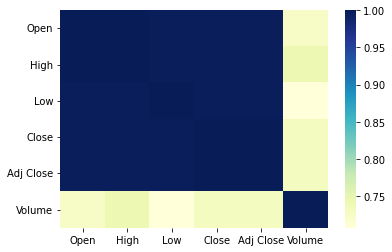

In [22]:
#Before to make our predicitons, we have to get the correlation between the values

correlation = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

figure = sns.heatmap(correlation, cmap = "YlGnBu")

plt.show(figure)

The volume column has a low correlation with the other columns in comparison. But, the correlations are almost perfect betwenn prices columns (open, high, low and close). To continue our study, we'll focus our predictions in these columns.

To continue our study, let's define our prediction time, i decided to predict until the next 90 days (considering i made this study in 2021's may).

In [23]:
#Importing our machine learning library

from autots import AutoTS

model = AutoTS(forecast_length = 232, frequency = 'infer', ensemble = 'simple')
model = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

prediction = model.predict()
forecast = prediction.forecast


Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
43/43 [==============================] - 13s 10ms/step - loss: 0.4192
Epoch 2/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4167
Epoch 3/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4150
Epoch 4/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4151
Epoch 5/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4113
Epoch 6/50
43/43 [==============================] - 0s 11ms/step - loss: 0.4077
Epoch 7/50
43/43 [==============================] - 0s 11ms/step - loss: 0.4055
Epoch 8/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4033
Epoch 9/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4000
Epoch 10/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4003
Epoch 11/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4004
Epoch 12/50
43/43 [==============================

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 47 with model FBProphet in generation 0 of 10
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 w

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 97 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 97: GluonTS
Model Number: 98 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 98: WindowRegression
Model Number: 99 with model FBProphet in generation 0 of 10
Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 101: UnobservedComponents
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 112 with model DatepartRegression in generation 0 of 10
Epoch 1/100
17/17 [==============================] - 8s 74ms/step - loss: 7.2245 - val_loss: 9.3368
Epoch 2/100
17/17 [==============================] - 1s 40ms/step - loss: 6.5102 - val_loss: 9.2835
Epoch 3/100
17/17 [==============================] - 1s 46ms/step - loss: 6.5703 - val_loss: 9.2751
Epoch 4/100
17/17 [==============================] - 1s 40ms/step - loss: 6.5464 - val_loss: 9.2763
Epoch 5/100
17/17 [==============================] - 1s 40ms/step - loss: 6.4491 - val_loss: 9.2754
Epoch 6/100
17/17 [==============================] - 1s 40ms/step - loss: 6.4956 - val_loss: 9.2730
Epoch 7/100
17/17 [==============================] - 1s 40ms/step - loss: 6.4803 - val_loss: 9.2732
Epoch 8/100
17/17 [==============================] - 1s 40ms/step - loss: 6.5001 - val_loss: 9.2806
Epoch 9/100
17/17 [==============================] - 1s 40ms/step - loss: 6.4684 - val_loss: 9.2747
Epoch 10/100
17/17 [==========

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 126 with model FBProphet in generation 0 of 10
Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 130: Theta
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 133: Theta
Model 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 191 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 192 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 193 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 194 with model FBProphet in generation 1 of 10
Model Number: 195 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 195: DatepartRegression
Model Number: 196 with model DatepartRegression in generation 1 of 10
Model Number: 197 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 197: DatepartRegression
Model Number: 198 with model GLM in generation 1 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 198: GLM
Model Number: 199 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 199: G

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log




Model Number: 209 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 209: VAR
Model Number: 210 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 210: VECM
Model Number: 211 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 211: VECM
Model Number: 212 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 212: VECM
Model Number: 213 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 213: VECM
Model Number: 214 with model Theta in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 214: Theta
Model Number: 215 with model Theta in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.ts

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 266 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 267 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 268 with model FBProphet in generation 2 of 10
Model Number: 269 with model GLS in generation 2 of 10
Model Number: 270 with model GLS in generation 2 of 10
Model Number: 271 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 271: DatepartRegression
Model Number: 272 with model DatepartRegression in generation 2 of 10
Epoch 1/50
16/16 [==============================] - 5s 41ms/step - loss: 77197424350724096.0000 - val_loss: 48289227841994752.0000
Epoch 2/50
16/16 [==============================] - 0s 16ms/step - loss: 68137512962359296.0000 - val_loss: 22258594997075968.0000
Epoch 3/50
16/16 [==============================] - 0s 18ms/step - loss: 64599409098227712.0000 - val_loss: 3905354706452480.0000
Epoch 4/50
16/16 [==============================] - 0s 16ms/step - loss: 57281570804858880.0000 - val_loss: 45613368727306240.0000
Epoch 5/50
16/16 [==========================

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



Template Eval Error: ValueError('Only gave one variable to VAR') in model 285: VAR
Model Number: 286 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 286: VECM
Model Number: 287 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 287: VECM
Model Number: 288 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 288: VECM
Model Number: 289 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 289: VECM
Model Number: 290 with model Theta in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 290: Theta
Model Number: 291 with model Theta in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 291: Theta
Model Number: 292 w

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 333 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+06, tolerance: 2.707e+03

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 334 with model ZeroesNaive in generation 3 of 10
Model Number: 335 with model ZeroesNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 336 with model ZeroesNaive in generation 3 of 10
Model Number: 337 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 338 with model DatepartRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 339 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 339: DatepartRegression
Model Number: 340 with model SectionalMotif in generation 3 of 10
Model Number: 341 with model SectionalMotif in generation 3 of 10
Model Number: 342 with model SectionalMotif in generation 3 of 10
Model Number: 343 with model SectionalMotif in generation 3 of 10
Model Number: 344 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 345 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 346 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 347 with model FBProphet in generation 3 of 10
Model Number: 348 with model GLS in generation 3 of 10
Model Number: 349 with model GLS in generation 3 of 10
Model Number: 350 with model GLS in generation 3 of 10
Model Number: 351 with model GLM in generation 3 of 10
Model Number: 352 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 352: GLM
Model Number: 353 with model GLM in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 354 with model GLM in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 355 with model GluonTS in generation 3 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 355: GluonTS
Model Number: 356 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 356: GluonTS
Model Number: 357 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 357: GluonTS
Model Number: 358 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 358: GluonTS
Model Number: 359 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 359: VAR
Model Number: 360 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR

/usr/local/lib/python3.7/dist-packages/autots/models/base.py:344: RuntimeWarning:

overflow encountered in square



Model Number: 388 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 389 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 390 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 391 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 392 with model AverageValueNaive in generation 4 of 10
Model Number: 393 with model AverageValueNaive in generation 4 of 10
Model Number: 394 with model AverageValueNaive in generation 4 of 10
Model Number: 395 with model NVAR in generation 4 of 10
Model Number: 396 with model NVAR in generation 4 of 1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 420 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 421 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 422 with model FBProphet in generation 4 of 10
Model Number: 423 with model GLM in generation 4 of 10
Model Number: 424 with model GLM in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 425 with model GLM in generation 4 of 10
Model Number: 426 with model GLM in generation 4 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 426: GLM
Model Number: 427 with model GLS in generation 4 of 10
Model Number: 428 with model GLS in generation 4 of 10
Model Number: 429 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 429: GluonTS
Model Number: 430 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 430: GluonTS
Model Number: 431 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 490: DatepartRegression
Model Number: 491 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 492 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 493 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 494 with model FBProphet in generation 5 of 10
Model Number: 495 with model SectionalMotif in generation 5 of 10
Model Number: 496 with model SectionalMotif in generation 5 of 10
Model Number: 497 with model SectionalMotif in generation 5 of 10
Model Number: 498 with model SectionalMotif in generation 5 of 10
Model Number: 499 with model GLM in generation 5 of 10
Model Number: 500 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 500: GLM
Model Number: 501 with model GLM in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 502 with model GLM in generation 5 of 10
Model Number: 503 with model GLS in generation 5 of 10
Model Number: 504 with model GLS in generation 5 of 10
Model Number: 505 with model GLS in generation 5 of 10
Model Number: 506 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 506: GluonTS
Model Number: 507 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 507: GluonTS
Model Number: 508 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 508: GluonTS
Model Number: 509 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 5

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 568 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 569 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 570 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 571 with model FBProphet in generation 6 of 10
Model Number: 572 with model SectionalMotif in generation 6 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 572: SectionalMotif
Model Number: 573 with model SectionalMotif in generation 6 of 10
Model Number: 574 with model SectionalMotif in generation 6 of 10
Model Number: 575 with model SectionalMotif in generation 6 of 10
Model Number: 576 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 576: GLM
Model Number: 577 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 577: GLM
Model Number: 578 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the input

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/g

Model Number: 581 with model GLS in generation 6 of 10
Model Number: 582 with model GLS in generation 6 of 10
Model Number: 583 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 583: GluonTS
Model Number: 584 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 584: GluonTS
Model Number: 585 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 585: GluonTS
Model Number: 586 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 586: GluonTS
Model Number: 587 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 612 with model WindowRegression in generation 7 of 10
Model Number: 613 with model SeasonalNaive in generation 7 of 10
Model Number: 614 with model SeasonalNaive in generation 7 of 10
Model Number: 615 with model SeasonalNaive in generation 7 of 10
Model Number: 616 with model SeasonalNaive in generation 7 of 10
Model Number: 617 with model ZeroesNaive in generation 7 of 10
Model Number: 618 with model ZeroesNaive in generation 7 of 10
Model Number: 619 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 620 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 621 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 622 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 642: DatepartRegression
Model Number: 643 with model DatepartRegression in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 644 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 645 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 646 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 647 with model FBProphet in generation 7 of 10
Model Number: 648 with model SectionalMotif in generation 7 of 10
Model Number: 649 with model SectionalMotif in generation 7 of 10
Model Number: 650 with model SectionalMotif in generation 7 of 10
Model Number: 651 with model SectionalMotif in generation 7 of 10
Model Number: 652 with model GLM in generation 7 of 10
Model Number: 653 with model GLM in generation 7 of 10
Model Number: 654 with model GLM in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 655 with model GLM in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 656 with model GLS in generation 7 of 10
Model Number: 657 with model GLS in generation 7 of 10
Model Number: 658 with model GLS in generation 7 of 10
Model Number: 659 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 659: GluonTS
Model Number: 660 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 660: GluonTS
Model Number: 661 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 661: GluonTS
Model Number: 662 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 662: GluonTS
Model Number: 663 with model VAR in generat

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 684 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 685 with model MultivariateRegression in generation 8 of 10
Model Number: 686 with model SeasonalNaive in generation 8 of 10
Model Number: 687 with model SeasonalNaive in generation 8 of 10
Model Number: 688 with model SeasonalNaive in generation 8 of 10
Model Number: 689 with model SeasonalNaive in generation 8 of 10
Model Number: 690 with model LastValueNaive in generation 8 of 10
Model Number: 691 with model LastValueNaive in generation 8 of 10
Model Number: 692 with model LastValueNaive in generation 8 of 10
Model Number: 693 with model ZeroesNaive in generation 8 of 10
Model Number: 694 with model ZeroesNaive in generation 8 of 10
Model Number: 695 with model ZeroesNaive in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 695: ZeroesNaive
Model Number: 696 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 697 with model ETS in generati

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 712 with model GLM in generation 8 of 10
Model Number: 713 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 713: GLM
Model Number: 714 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 714: DatepartRegression
Model Number: 715 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 716 with model DatepartRegression in generation 8 of 10
Model Number: 717 with model UnivariateMotif in generation 8 of 10
Model Number: 718 with model UnivariateMotif in generation 8 of 10
Model Number: 719 with model UnivariateMotif in generation 8 of 10
Model Number: 720 with model UnivariateMotif in generation 8 of 10
Model Number: 721 with model UnobservedComponents in generation 8 of 10
Model Number: 722 with model UnobservedComponents in generation 8 of 10
Model Number: 723 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 723: UnobservedComponents
Model Number: 724 with model SectionalMotif in generation 8 of 10
Model Number: 725 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 725: SectionalMotif
Model Number: 726 with model SectionalMotif in generation 8 of 10
M

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 729 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 730 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 731 with model FBProphet in generation 8 of 10
Model Number: 732 with model GLS in generation 8 of 10
Model Number: 733 with model GLS in generation 8 of 10
Model Number: 734 with model GLS in generation 8 of 10
Model Number: 735 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 735: GluonTS
Model Number: 736 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 736: GluonTS
Model Number: 737 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 737: GluonTS
Model Number: 738 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in m

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 792 with model GLM in generation 9 of 10
Model Number: 793 with model GLM in generation 9 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 793: GLM
Model Number: 794 with model GLM in generation 9 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 794: GLM
Model Number: 795 with model SectionalMotif in generation 9 of 10
Model Number: 796 with model SectionalMotif in generation 9 of 10
Model Number: 797 with model SectionalMotif in generation 9 of 10
Model Number: 798 with model SectionalMotif in generation 9 of 10
Model Number: 799 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 800 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 800: DatepartRegression
Model Number: 801 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.378e+01, tolerance: 6.600e-02



Model Number: 802 with model GLS in generation 9 of 10
Model Number: 803 with model GLS in generation 9 of 10
Model Number: 804 with model UnobservedComponents in generation 9 of 10
Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 2') in model 804: UnobservedComponents
Model Number: 805 with model UnobservedComponents in generation 9 of 10
Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 2') in model 805: UnobservedComponents
Model Number: 806 with model UnobservedComponents in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 1') in model 806: UnobservedComponents
Model Number: 807 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 808 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 809 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 810 with model FBProphet in generation 9 of 10
Model Number: 811 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 811: GluonTS
Model Number: 812 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 812: GluonTS
Model Number: 813 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 813: GluonTS
Model Number: 814 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 814: GluonTS
Model Number: 815 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 815: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 834 with model MultivariateRegression in generation 10 of 10
Model Number: 835 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 836 with model MultivariateRegression in generation 10 of 10
Model Number: 837 with model MultivariateRegression in generation 10 of 10
Model Number: 838 with model SeasonalNaive in generation 10 of 10
Model Number: 839 with model SeasonalNaive in generation 10 of 10
Model Number: 840 with model SeasonalNaive in generation 10 of 10
Model Number: 841 with model SeasonalNaive in generation 10 of 10
Model Number: 842 with model LastValueNaive in generation 10 of 10
Model Number: 843 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 843: LastValueNaive
Model Number: 844 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 845 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'"

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.469e+06, tolerance: 2.707e+03

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.469e+06, tolerance: 2.707e+03



Model Number: 858 with model UnivariateMotif in generation 10 of 10
Model Number: 859 with model UnivariateMotif in generation 10 of 10
Model Number: 860 with model UnivariateMotif in generation 10 of 10
Model Number: 861 with model UnivariateMotif in generation 10 of 10
Model Number: 862 with model AverageValueNaive in generation 10 of 10
Model Number: 863 with model AverageValueNaive in generation 10 of 10
Model Number: 864 with model AverageValueNaive in generation 10 of 10
Model Number: 865 with model NVAR in generation 10 of 10
Model Number: 866 with model NVAR in generation 10 of 10
Model Number: 867 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 867: NVAR
Model Number: 868 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 868: NVAR
Model Number: 869 with model GLM in generation 10 of 10
Template Eval Error: ValueError('The first guess 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning:

invalid value encountered in log



Model Number: 871 with model GLM in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning:

invalid value encountered in log



Model Number: 872 with model GLM in generation 10 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 872: GLM
Model Number: 873 with model DatepartRegression in generation 10 of 10
Model Number: 874 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 874: DatepartRegression
Model Number: 875 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 875: DatepartRegression
Model Number: 876 with model GLS in generation 10 of 10
Model Number: 877 with model GLS in generation 10 of 10
Model Number: 878 with model GLS in generation 10 of 10
Model Number: 879 with model UnobservedComponents in generation 10 of 10
Model Number: 880 with model UnobservedComponents in generation 10 of 10
Model Number: 881 with model UnobservedComponents in generation 10 o

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 883 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 884 with model Ensemble in generation 11 of 0
Model Number: 885 with model Ensemble in generation 11 of 0
Model Number: 886 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 887 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 888 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 889 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Validation Round: 1
Model Number: 1 of 134 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

1 - WindowRegression with avg smape 164.17: 
Model Number: 2 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

2 - Ensemble with avg smape 150.35: 
Model Number: 3 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

3 - Ensemble with avg smape 155.25: 
Model Number: 4 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

4 - Ensemble with avg smape 155.25: 
Model Number: 5 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

5 - Ensemble with avg smape 155.54: 
Model Number: 6 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

6 - Ensemble with avg smape 155.25: 
Model Number: 7 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
7 - Ensemble with avg smape 150.53: 
Model Number: 8 of 134 with model Ensemble for Validation 1
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 905, in model_forecast
    horizontal_subset=horizontal_subset,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 989, in model_forecast
    return_model=return_model,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 560, in ModelPrediction
    model_str
ValueError: Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True

FAILED: Ensemble BestN component 5 of 5 NVAR with error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True')
8 - Ensemble with avg smape 149.49: 
Model Number: 9 of 134 with model MultivariateRegression for Validation 1
9 - MultivariateRegression wit

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

34 - MultivariateRegression with avg smape 147.67: 
Model Number: 35 of 134 with model MultivariateRegression for Validation 1
35 - MultivariateRegression with avg smape 149.74: 
Model Number: 36 of 134 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

36 - MultivariateRegression with avg smape 148.99: 
Model Number: 37 of 134 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



37 - WindowRegression with avg smape 97.87: 
Model Number: 38 of 134 with model LastValueNaive for Validation 1
38 - LastValueNaive with avg smape 148.81: 
Model Number: 39 of 134 with model SeasonalNaive for Validation 1
39 - SeasonalNaive with avg smape 154.34: 
Model Number: 40 of 134 with model MultivariateMotif for Validation 1
40 - MultivariateMotif with avg smape 171.29: 
Model Number: 41 of 134 with model SectionalMotif for Validation 1
41 - SectionalMotif with avg smape 152.73: 
Model Number: 42 of 134 with model SeasonalNaive for Validation 1
42 - SeasonalNaive with avg smape 147.59: 
Model Number: 43 of 134 with model MultivariateMotif for Validation 1
43 - MultivariateMotif with avg smape 153.49: 
Model Number: 44 of 134 with model SectionalMotif for Validation 1
44 - SectionalMotif with avg smape 155.47: 
Model Number: 45 of 134 with model ZeroesNaive for Validation 1
45 - ZeroesNaive with avg smape 149.42: 
Model Number: 46 of 134 with model ZeroesNaive for Validation 1
4

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



58 - GLM with avg smape 147.05: 
Model Number: 59 of 134 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



59 - GLM with avg smape 147.05: 
Model Number: 60 of 134 with model NVAR for Validation 1
60 - NVAR with avg smape 164.4: 
Model Number: 61 of 134 with model NVAR for Validation 1
61 - NVAR with avg smape 165.16: 
Model Number: 62 of 134 with model NVAR for Validation 1
62 - NVAR with avg smape 165.74: 
Model Number: 63 of 134 with model NVAR for Validation 1
63 - NVAR with avg smape 163.68: 
Model Number: 64 of 134 with model SectionalMotif for Validation 1
64 - SectionalMotif with avg smape 154.31: 
Model Number: 65 of 134 with model NVAR for Validation 1
65 - NVAR with avg smape 163.0: 
Model Number: 66 of 134 with model MultivariateMotif for Validation 1
66 - MultivariateMotif with avg smape 152.85: 
Model Number: 67 of 134 with model SectionalMotif for Validation 1
67 - SectionalMotif with avg smape 152.34: 
Model Number: 68 of 134 with model MultivariateRegression for Validation 1
68 - MultivariateRegression with avg smape 129.99: 
Model Number: 69 of 134 with model DatepartRegre

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


69 - DatepartRegression with avg smape 150.87: 
Model Number: 70 of 134 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



70 - GLM with avg smape 147.05: 
Model Number: 71 of 134 with model Ensemble for Validation 1
71 - Ensemble with avg smape 64.24: 
Model Number: 72 of 134 with model MultivariateRegression for Validation 1
72 - MultivariateRegression with avg smape 148.83: 
Model Number: 73 of 134 with model AverageValueNaive for Validation 1
73 - AverageValueNaive with avg smape 163.23: 
Model Number: 74 of 134 with model GLS for Validation 1
74 - GLS with avg smape 162.89: 
Model Number: 75 of 134 with model DatepartRegression for Validation 1
75 - DatepartRegression with avg smape 155.02: 
Model Number: 76 of 134 with model AverageValueNaive for Validation 1
76 - AverageValueNaive with avg smape 130.8: 
Model Number: 77 of 134 with model UnivariateMotif for Validation 1
77 - UnivariateMotif with avg smape 154.67: 
Model Number: 78 of 134 with model UnivariateMotif for Validation 1
78 - UnivariateMotif with avg smape 150.26: 
Model Number: 79 of 134 with model ZeroesNaive for Validation 1
79 - Zeroes

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

89 - WindowRegression with avg smape 157.14: 
Model Number: 90 of 134 with model UnobservedComponents for Validation 1
90 - UnobservedComponents with avg smape 133.65: 
Model Number: 91 of 134 with model UnobservedComponents for Validation 1
91 - UnobservedComponents with avg smape 97.24: 
Model Number: 92 of 134 with model ZeroesNaive for Validation 1
92 - ZeroesNaive with avg smape 135.95: 
Model Number: 93 of 134 with model UnivariateMotif for Validation 1
93 - UnivariateMotif with avg smape 150.99: 
Model Number: 94 of 134 with model UnivariateMotif for Validation 1
94 - UnivariateMotif with avg smape 141.05: 
Model Number: 95 of 134 with model AverageValueNaive for Validation 1
95 - AverageValueNaive with avg smape 128.38: 
Model Number: 96 of 134 with model UnivariateMotif for Validation 1
96 - UnivariateMotif with avg smape 155.94: 
Model Number: 97 of 134 with model UnobservedComponents for Validation 1
97 - UnobservedComponents with avg smape 114.0: 
Model Number: 98 of 134 wi

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


103 - ZeroesNaive with avg smape 146.57: 
Model Number: 104 of 134 with model FBProphet for Validation 1
104 - FBProphet with avg smape 163.88: 
Model Number: 105 of 134 with model SectionalMotif for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


105 - SectionalMotif with avg smape 145.92: 
Model Number: 106 of 134 with model FBProphet for Validation 1
106 - FBProphet with avg smape 146.69: 
Model Number: 107 of 134 with model AverageValueNaive for Validation 1
107 - AverageValueNaive with avg smape 130.57: 
Model Number: 108 of 134 with model UnobservedComponents for Validation 1
108 - UnobservedComponents with avg smape 156.91: 
Model Number: 109 of 134 with model SectionalMotif for Validation 1
109 - SectionalMotif with avg smape 150.07: 
Model Number: 110 of 134 with model UnobservedComponents for Validation 1
110 - UnobservedComponents with avg smape 147.2: 
Model Number: 111 of 134 with model DatepartRegression for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - DatepartRegression with avg smape 148.89: 
Model Number: 112 of 134 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112 - FBProphet with avg smape 131.24: 
Model Number: 113 of 134 with model FBProphet for Validation 1
113 - FBProphet with avg smape 116.99: 
Model Number: 114 of 134 with model AverageValueNaive for Validation 1
114 - AverageValueNaive with avg smape 167.47: 
Model Number: 115 of 134 with model UnobservedComponents for Validation 1
115 - UnobservedComponents with avg smape 159.63: 
Model Number: 116 of 134 with model SectionalMotif for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - SectionalMotif with avg smape 140.06: 
Model Number: 117 of 134 with model FBProphet for Validation 1
117 - FBProphet with avg smape 109.99: 
Model Number: 118 of 134 with model GLM for Validation 1
118 - GLM with avg smape 164.78: 
Model Number: 119 of 134 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


119 - DatepartRegression with avg smape 151.88: 
Model Number: 120 of 134 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


120 - DatepartRegression with avg smape 151.74: 
Model Number: 121 of 134 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121 - FBProphet with avg smape 157.08: 
Model Number: 122 of 134 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - FBProphet with avg smape 156.33: 
Model Number: 123 of 134 with model FBProphet for Validation 1
123 - FBProphet with avg smape 136.9: 
Model Number: 124 of 134 with model GLS for Validation 1
124 - GLS with avg smape 166.75: 
Model Number: 125 of 134 with model GLM for Validation 1
125 - GLM with avg smape 166.57: 
Model Number: 126 of 134 with model GLM for Validation 1
126 - GLM with avg smape 166.57: 
Model Number: 127 of 134 with model GLS for Validation 1
127 - GLS with avg smape 166.07: 
Model Number: 128 of 134 with model GLM for Validation 1
128 - GLM with avg smape 166.01: 
Model Number: 129 of 134 with model GLS for Validation 1
129 - GLS with avg smape 166.09: 
Model Number: 130 of 134 with model GLS for Validation 1
130 - GLS with avg smape 166.09: 
Model Number: 131 of 134 with model GLS for Validation 1
131 - GLS with avg smape 166.09: 
Model Number: 132 of 134 with model GLS for Validation 1
132 - GLS with avg smape 166.03: 
Model Number: 133 of 134 with model GLS

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

1 - WindowRegression with avg smape 24.59: 
Model Number: 2 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

2 - Ensemble with avg smape 44.15: 
Model Number: 3 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

3 - Ensemble with avg smape 38.33: 
Model Number: 4 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

4 - Ensemble with avg smape 38.33: 
Model Number: 5 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

5 - Ensemble with avg smape 37.87: 
Model Number: 6 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

6 - Ensemble with avg smape 38.33: 
Model Number: 7 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
7 - Ensemble with avg smape 42.31: 
Model Number: 8 of 134 with model Ensemble for Validation 2
8 - Ensemble with avg smape 48.17: 
Model Number: 9 of 134 with model MultivariateRegression for Validation 2
9 - MultivariateRegression with avg smape 47.71: 
Model Number: 10 of 134 with model SeasonalNaive for Validation 2
10 - SeasonalNaive with avg smape 44.59: 
Model Number: 11 of 134 with model LastValueNaive for Validation 2
11 - LastValueNaive with avg smape 44.44: 
Model Number: 12 of 134 with model LastValueNaive for Validation 2
12 - LastValueNaive with avg smape 38.27: 
Model Number: 13 of 134 with model LastValueNaive for Validation 2
13 - LastValueNaive with avg smape 38.03: 
Model Number: 14 of 134 with model WindowRegression for Validation 2
14 - WindowRegression with avg smape 29.96: 
Model Number: 15 of 134 with model SeasonalNaive for Validation 2
15 - SeasonalNaive with avg smape 44.9: 
M

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

34 - MultivariateRegression with avg smape 37.86: 
Model Number: 35 of 134 with model MultivariateRegression for Validation 2
35 - MultivariateRegression with avg smape 37.86: 
Model Number: 36 of 134 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

36 - MultivariateRegression with avg smape 37.49: 
Model Number: 37 of 134 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



37 - WindowRegression with avg smape 72.65: 
Model Number: 38 of 134 with model LastValueNaive for Validation 2
38 - LastValueNaive with avg smape 45.94: 
Model Number: 39 of 134 with model SeasonalNaive for Validation 2
39 - SeasonalNaive with avg smape 41.47: 
Model Number: 40 of 134 with model MultivariateMotif for Validation 2
40 - MultivariateMotif with avg smape 34.95: 
Model Number: 41 of 134 with model SectionalMotif for Validation 2
41 - SectionalMotif with avg smape 28.44: 
Model Number: 42 of 134 with model SeasonalNaive for Validation 2
42 - SeasonalNaive with avg smape 45.87: 
Model Number: 43 of 134 with model MultivariateMotif for Validation 2
43 - MultivariateMotif with avg smape 38.11: 
Model Number: 44 of 134 with model SectionalMotif for Validation 2
44 - SectionalMotif with avg smape 29.55: 
Model Number: 45 of 134 with model ZeroesNaive for Validation 2
45 - ZeroesNaive with avg smape 44.44: 
Model Number: 46 of 134 with model ZeroesNaive for Validation 2
46 - Zero

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


69 - DatepartRegression with avg smape 45.22: 
Model Number: 70 of 134 with model GLM for Validation 2
70 - GLM with avg smape 30.42: 
Model Number: 71 of 134 with model Ensemble for Validation 2
71 - Ensemble with avg smape 111.58: 
Model Number: 72 of 134 with model MultivariateRegression for Validation 2
72 - MultivariateRegression with avg smape 41.02: 
Model Number: 73 of 134 with model AverageValueNaive for Validation 2
73 - AverageValueNaive with avg smape 47.85: 
Model Number: 74 of 134 with model GLS for Validation 2
74 - GLS with avg smape 94.09: 
Model Number: 75 of 134 with model DatepartRegression for Validation 2
75 - DatepartRegression with avg smape 57.89: 
Model Number: 76 of 134 with model AverageValueNaive for Validation 2
76 - AverageValueNaive with avg smape 47.25: 
Model Number: 77 of 134 with model UnivariateMotif for Validation 2
77 - UnivariateMotif with avg smape 30.01: 
Model Number: 78 of 134 with model UnivariateMotif for Validation 2
78 - UnivariateMotif w

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

89 - WindowRegression with avg smape 16.94: 
Model Number: 90 of 134 with model UnobservedComponents for Validation 2
90 - UnobservedComponents with avg smape 200.0: 
Model Number: 91 of 134 with model UnobservedComponents for Validation 2
91 - UnobservedComponents with avg smape 59.28: 
Model Number: 92 of 134 with model ZeroesNaive for Validation 2
92 - ZeroesNaive with avg smape 40.12: 
Model Number: 93 of 134 with model UnivariateMotif for Validation 2
93 - UnivariateMotif with avg smape 13.66: 
Model Number: 94 of 134 with model UnivariateMotif for Validation 2
94 - UnivariateMotif with avg smape 30.89: 
Model Number: 95 of 134 with model AverageValueNaive for Validation 2
95 - AverageValueNaive with avg smape 55.78: 
Model Number: 96 of 134 with model UnivariateMotif for Validation 2
96 - UnivariateMotif with avg smape 47.4: 
Model Number: 97 of 134 with model UnobservedComponents for Validation 2
97 - UnobservedComponents with avg smape 200.0: 
Model Number: 98 of 134 with model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


103 - ZeroesNaive with avg smape 39.22: 
Model Number: 104 of 134 with model FBProphet for Validation 2
104 - FBProphet with avg smape 20.24: 
Model Number: 105 of 134 with model SectionalMotif for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


105 - SectionalMotif with avg smape 27.14: 
Model Number: 106 of 134 with model FBProphet for Validation 2
106 - FBProphet with avg smape 11.94: 
Model Number: 107 of 134 with model AverageValueNaive for Validation 2
107 - AverageValueNaive with avg smape 200.0: 
Model Number: 108 of 134 with model UnobservedComponents for Validation 2
108 - UnobservedComponents with avg smape 57.55: 
Model Number: 109 of 134 with model SectionalMotif for Validation 2
109 - SectionalMotif with avg smape 35.02: 
Model Number: 110 of 134 with model UnobservedComponents for Validation 2
110 - UnobservedComponents with avg smape 44.31: 
Model Number: 111 of 134 with model DatepartRegression for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - DatepartRegression with avg smape 45.9: 
Model Number: 112 of 134 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112 - FBProphet with avg smape 134.89: 
Model Number: 113 of 134 with model FBProphet for Validation 2
113 - FBProphet with avg smape 141.08: 
Model Number: 114 of 134 with model AverageValueNaive for Validation 2
114 - AverageValueNaive with avg smape 47.09: 
Model Number: 115 of 134 with model UnobservedComponents for Validation 2
115 - UnobservedComponents with avg smape 60.75: 
Model Number: 116 of 134 with model SectionalMotif for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - SectionalMotif with avg smape 78.93: 
Model Number: 117 of 134 with model FBProphet for Validation 2
117 - FBProphet with avg smape 159.66: 
Model Number: 118 of 134 with model GLM for Validation 2
118 - GLM with avg smape 25.77: 
Model Number: 119 of 134 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


119 - DatepartRegression with avg smape 33.69: 
Model Number: 120 of 134 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


120 - DatepartRegression with avg smape 36.29: 
Model Number: 121 of 134 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121 - FBProphet with avg smape 55.26: 
Model Number: 122 of 134 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - FBProphet with avg smape 42.73: 
Model Number: 123 of 134 with model FBProphet for Validation 2
123 - FBProphet with avg smape 104.3: 
Model Number: 124 of 134 with model GLS for Validation 2
124 - GLS with avg smape 27.75: 
Model Number: 125 of 134 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



125 - GLM with avg smape 29.82: 
Model Number: 126 of 134 with model GLM for Validation 2
126 - GLM with avg smape 29.86: 
Model Number: 127 of 134 with model GLS for Validation 2
127 - GLS with avg smape 27.31: 
Model Number: 128 of 134 with model GLM for Validation 2
128 - GLM with avg smape 26.76: 
Model Number: 129 of 134 with model GLS for Validation 2
129 - GLS with avg smape 26.94: 
Model Number: 130 of 134 with model GLS for Validation 2
130 - GLS with avg smape 26.86: 
Model Number: 131 of 134 with model GLS for Validation 2
131 - GLS with avg smape 26.93: 
Model Number: 132 of 134 with model GLS for Validation 2
132 - GLS with avg smape 26.92: 
Model Number: 133 of 134 with model GLS for Validation 2
133 - GLS with avg smape 26.75: 
Model Number: 134 of 134 with model GLM for Validation 2
134 - GLM with avg smape 26.94: 


Now, it's time to plot our results

In [26]:
forecast['Date'] = forecast.index #passing the index date to a Date column

import plotly.express as px

fig = px.line(forecast, x = "Date", y = "Close", title = 'BNB close price forecast until the end of year') #plotting our forecast

fig.show()

In [25]:
# now, let's see BNB percentile of variation

x1 = forecast['Close'].min()
x2 = forecast['Close'].max()

x = ((x2/x1)-1)*100

print(x,"%")

67.43852734548157 %


Wich means from now until the peak (around final of september/october of december), the BNB tends to variate closer to 67%.(too good, isn't it)?


#**Conclusions**

The BNB coin is the most valuable coins in cryptomarket today. Unfortunately, some events that happens today made all of cryptocurrencies drops, and with the characteristic volatility of the market, your price goes down. 

As we see with the forecast, despite some actual events, the BNB price tends to increase during the days, what makes new and old investors became bullish (some crypto slang when you bet in some cryptocurrent increase).